In [125]:

server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'
path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behaviour-ScoreCard-DATA-223-/1. Data/1. BSD copy .sql"


from Preprocessing_Application_N import DataPreprocessor


# Initialize DataPreprocessor

# Usage
processor = DataPreprocessor(server, database, username, password)
df = processor.fetch_data_from_sql(path)  # path should be the file path to your SQL script


#df.to_csv('BSC_Today.csv', index=False)

/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behaviour-ScoreCard-DATA-223-/2. Code/Preprocessing_Application_N.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, con=self.conn)


In [128]:
min(df.SnapshotDate)

datetime.date(2023, 7, 31)

In [129]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

In [130]:
path = '/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behaviour-ScoreCard-DATA-223-/2. Code'

# Change the current working directory
os.chdir(path)

df = pd.read_csv('BSC_Today.csv')


main = df[df.CoappFlag == 0]

co = df[df.CoappFlag == 1]

main = main[~main.AccountNumber.isin(co.AccountNumber)]

df = pd.concat([main,co])

# This was just a control to reconsile the number of accounts
# konton = df[ (df.AccountStatus.isin(['OPEN','FROZEN'])) & (df.SnapshotDate == max(df.SnapshotDate))   ]

/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_1372/519599501.py:6: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BSC_Today.csv')


In [131]:
df[df.AccountNumber == 7809940].sort_values('MOB')

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
5280,2023-11-30,1,7809940,OPEN,122127.19,13,2022-10-04,82,1,0,1,DAC85B9F6BA37E3EF93ADFB3BECD336AA8F3653A9FB882...,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.396739,E5
14759,2023-12-31,1,7809940,OPEN,124196.38,14,2022-10-04,81,1,0,1,DAC85B9F6BA37E3EF93ADFB3BECD336AA8F3653A9FB882...,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.396739,E5
24072,2024-01-31,1,7809940,OPEN,123478.68,15,2022-10-04,80,1,0,1,DAC85B9F6BA37E3EF93ADFB3BECD336AA8F3653A9FB882...,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.396739,E5


In [132]:
coefficients = np.array([-0.44414603,  0.18778622 , 0.3539554 ,  0.70178643])
intercept = np.array([0])


# Sample DataFrame (Assuming you already have this in place)
pd_ = df.copy()

# Coefficients and Intercept from the Logistic Regression model


print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Compute the Z values using your logistic regression model
pd_['Z'] = (pd_.CoappFlag * coefficients[0] +
            pd_.Ever30In6Months * coefficients[1] + 
            pd_.WorstDelinquency6M * coefficients[2] +
            pd_.CurrentDelinquencyStatus * coefficients[3] +

            intercept[0]) 

# Compute the original probabilities
pd_['P'] = pd_['Z'].apply(lambda x: 1 / (1 + np.exp(-x)))

# Coefficients and Intercept from the Calibration model
calibration_coef = 9.82696528
calibration_intercept = -8.57437634


print("Coefficient:", calibration_coef)
print("Intercept:", calibration_intercept)

# Using the original probabilities to calibrate them with the calibration model
pd_['Z_calibrated'] = pd_['P'].apply(lambda x: x * calibration_coef + calibration_intercept)

# Compute the calibrated probabilities
pd_['BehaviourModel'] = pd_['Z_calibrated'].apply(lambda x: 1 / (1 + np.exp(-x)))


pd_

Coefficients: [-0.44414603  0.18778622  0.3539554   0.70178643]
Intercept: [0]
Coefficient: 9.82696528
Intercept: -8.57437634


,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass,Z,P,Z_calibrated,BehaviourModel
0,2023-11-30,1,7292592,OPEN,173206.24,26,2021-09-02,153,0,1,0,CE315A1C525C592F66BE25D785566BAA0E2C1741EDD913...,4,0,NaN,5.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,27.0,27.0,27.0,27.0,27.0,173206.24,173206.24,173206.24,0.0,0.0,100.000000,E8,4.410754,0.988000,1.134663,0.756698
1,2023-11-30,1,7292998,OPEN,284081.88,26,2021-09-02,153,0,0,1,564EA7586EB111950F807E0AD3CFB1348CEC1ED143D1BE...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.654435,E4,0.000000,0.500000,-3.660894,0.025065
2,2023-11-30,1,7293731,OPEN,173880.43,26,2021-09-07,153,0,0,1,1E0E3C492ECBD9B08045D252EB003F1697A62F518E619A...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.654435,E4,0.000000,0.500000,-3.660894,0.025065
7,2023-11-30,1,7322845,OPEN,259492.84,52,2019-07-19,68,0,0,1,7630F31C721A4F657B8F09C26ED3F5F397881B75C80DBA...,1,0,16.0,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,2,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.215327,E5,1.597483,0.831666,-0.401620,0.400923
10,2023-11-30,1,7410699,OPEN,183636.78,51,2019-08-15,69,0,0,1,1B3F07C4F5F6CCC33D64EB5AB739189DB8DB71A064392D...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.654435,E4,0.000000,0.500000,-3.660894,0.025065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55077,2024-01-31,1,7446214,CLOSED,0.00,53,2019-08-22,0,1,1,0,5BC06C04A83D55A6BD3A7DB67612B0245B0C2C01F6119D...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.444146,0.390753,-4.734455,0.008711
55078,2023-12-31,1,5248240,CLOSED,0.00,68,2018-04-20,105,1,0,1,8B6E255BDC127A5EC774E91A34511BB8AB2382AA06F6BB...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.444146,0.390753,-4.734455,0.008711
55080,2023-11-30,1,7751076,CLOSED,0.00,18,2022-05-13,105,1,0,1,D2BEAF7B9352291D655D898ED6B73E42BEA3BD871792D1...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.444146,0.390753,-4.734455,0.008711
55089,2023-12-31,1,5810825,CLOSED,0.00,56,2019-04-18,76,1,1,0,9C631A91223735DFA1A498D715A9D

In [133]:
see = pd_[pd_.Score >-1]

## Without when the accounts are Zero after CLOSED

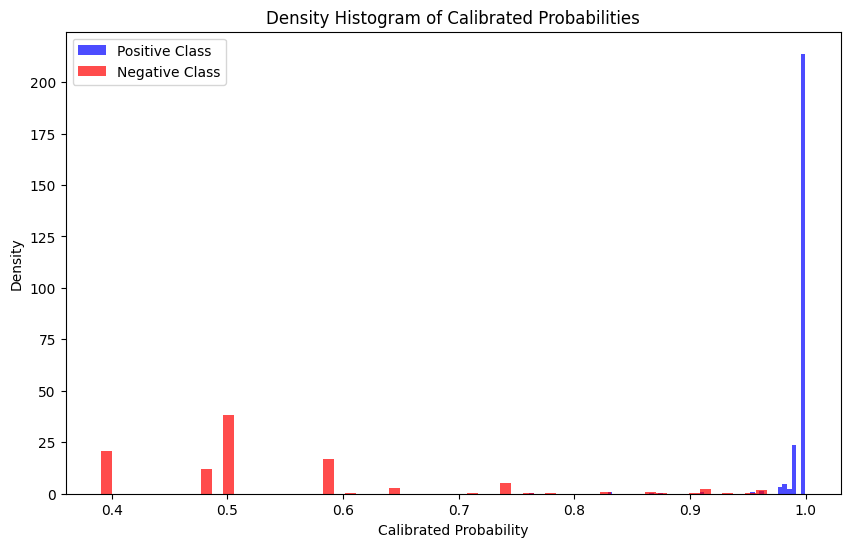

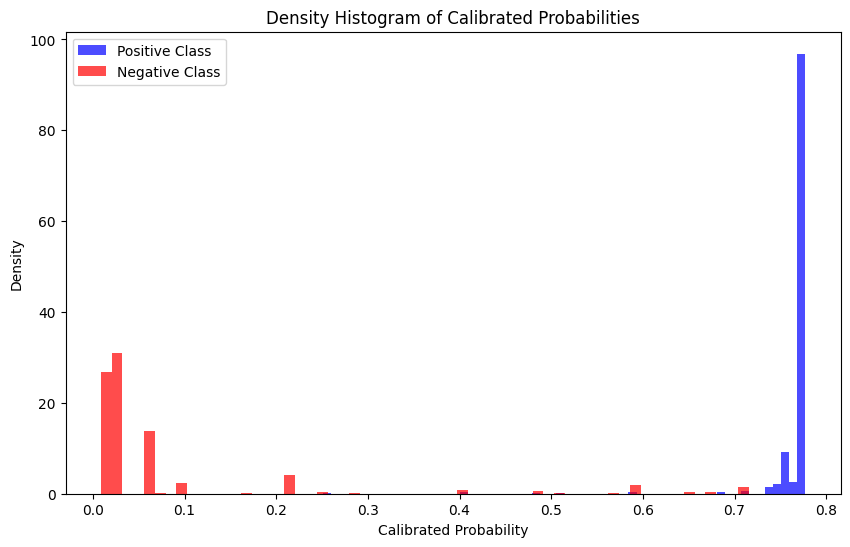

In [134]:
# Get the calibrated probabilities
calibrated_probabilities = see['P']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[see['Ever90'] == 1]
negative_class = calibrated_probabilities[see['Ever90'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=60, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=60, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()

# Get the calibrated probabilities
calibrated_probabilities = see['BehaviourModel']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[see['Ever90'] == 1]
negative_class = calibrated_probabilities[see['Ever90'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=60, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=60, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()



## ALL ACCOUNTS WITH CLOSED --> Zero

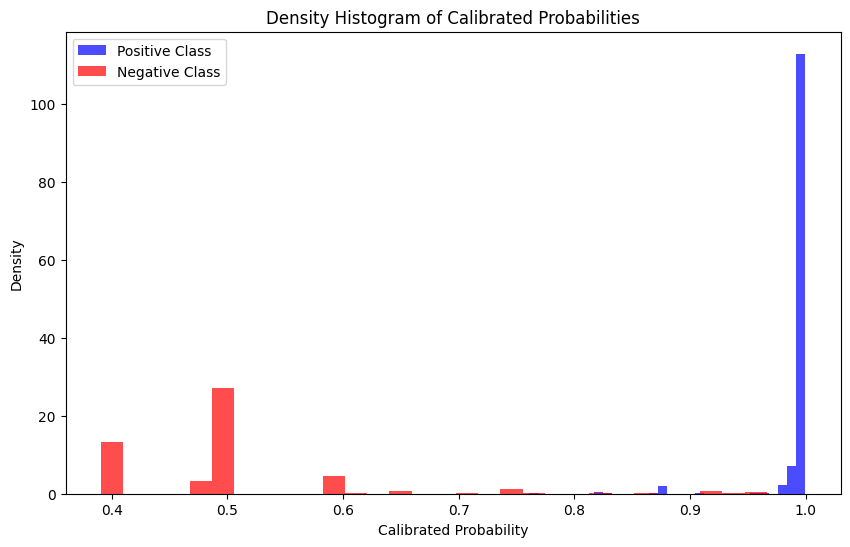

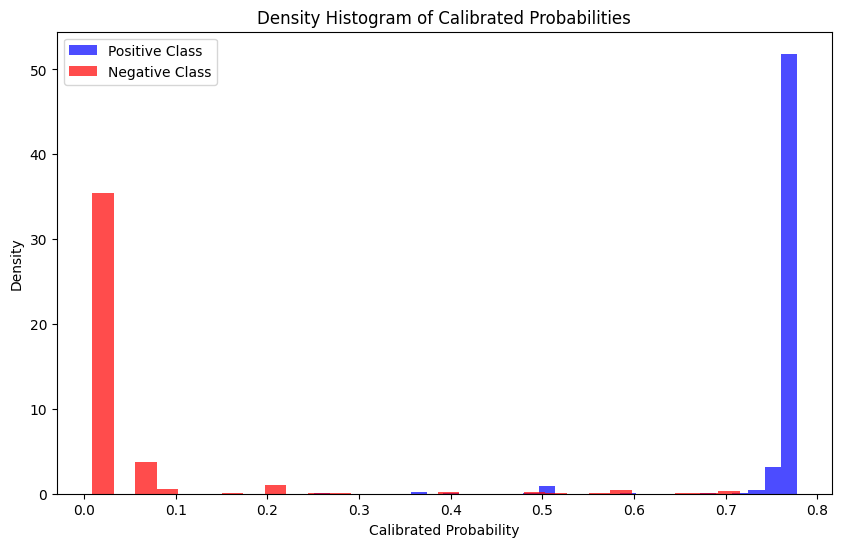

In [135]:
# Get the calibrated probabilities
calibrated_probabilities = pd_['P']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[pd_['Ever90'] == 1]
negative_class = calibrated_probabilities[pd_['Ever90'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()

# Get the calibrated probabilities
calibrated_probabilities = pd_['BehaviourModel']

# Split the data into positive and negative classes
positive_class = calibrated_probabilities[pd_['Ever90'] == 1]
negative_class = calibrated_probabilities[pd_['Ever90'] == 0]

# Plot density histograms of calibrated probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, density=True, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, density=True, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Density')
plt.title('Density Histogram of Calibrated Probabilities')
plt.legend()
plt.show()



In [136]:
pd_ = pd_[['AccountNumber','AccountStatus','SnapshotDate',	'MOB'	,'DisbursedDate',	'CurrentAmount','RemainingTenor','CoappFlag',	'Ever30In6Months',	'WorstDelinquency6M','CurrentDelinquencyStatus','WorstDelinquency12M','Ever30In12Months','Ever90In12Months'	,'Score'	,'RiskClass','P','BehaviourModel','Ever90']]

In [137]:
pd_

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90
0,7292592,OPEN,2023-11-30,26,2021-09-02,173206.24,153,0,1,4,4,4,1,1,100.000000,E8,0.988000,0.756698,1
1,7292998,OPEN,2023-11-30,26,2021-09-02,284081.88,153,0,0,0,0,0,0,0,3.654435,E4,0.500000,0.025065,0
2,7293731,OPEN,2023-11-30,26,2021-09-07,173880.43,153,0,0,0,0,0,0,0,3.654435,E4,0.500000,0.025065,0
7,7322845,OPEN,2023-11-30,52,2019-07-19,259492.84,68,0,1,2,1,2,1,0,39.215327,E5,0.831666,0.400923,0
10,7410699,OPEN,2023-11-30,51,2019-08-15,183636.78,69,0,0,0,0,0,0,0,3.654435,E4,0.500000,0.025065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55077,7446214,CLOSED,2024-01-31,53,2019-08-22,0.00,0,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
55078,5248240,CLOSED,2023-12-31,68,2018-04-20,0.00,105,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
55080,7751076,CLOSED,2023-11-30,18,2022-05-13,0.00,105,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
55089,5810825,CLOSED,2023-12-31,56,2019-04-18,0.00,76,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0


In [138]:
print(np.mean(pd_.P))
min(pd_.P)

0.5747847054860274


0.3907534979348959

In [139]:
print(np.mean(pd_.BehaviourModel))
max(pd_.BehaviourModel)

0.15593932356360224


0.7773140874043875

In [140]:
print(np.mean(see.P))
min(see.P)

0.6130028782352539


0.3907534979348959

In [141]:
pd_.tail(40)

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90
54935,7161060,CLOSED,2023-12-31,43,2020-05-06,0.0,137,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54939,7269624,CLOSED,2024-01-31,31,2021-06-11,0.0,155,1,1,5,9,5,1,1,NaN,NaN,0.999602,0.777071,1
54940,5414990,CLOSED,2023-11-30,61,2018-10-15,0.0,134,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54950,5256664,CLOSED,2024-01-31,68,2018-05-07,0.0,133,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54954,7570898,CLOSED,2023-11-30,50,2019-09-25,0.0,115,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54957,5606595,CLOSED,2023-11-30,57,2019-02-12,0.0,118,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54959,7202641,CLOSED,2024-01-31,55,2019-06-20,0.0,0,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54962,5283833,CLOSED,2024-01-31,68,2018-05-31,0.0,1,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54967,7247604,CLOSED,2023-12-31,32,2021-04-07,0.0,20,1,0,0,0,0,0,0,NaN,NaN,0.390753,0.008711,0
54970,7175706,CLOSED,2024-01-31,43,2020-06-30,0.0,164,1,1,5,9,5,1,1,NaN,NaN,0.999602,0.777071,1


In [142]:
BehaviourDone = pd_.copy()

In [143]:
BehaviourDone[BehaviourDone.AccountNumber ==  7257967].sort_values(by='MOB')

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90
6557,7257967,OPEN,2023-11-30,30,2021-05-17,258257.52,148,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0
13122,7257967,OPEN,2023-12-31,31,2021-05-17,257658.27,147,0,1,2,1,2,1,0,39.215327,E5,0.831666,0.400923,0
18216,7257967,OPEN,2024-01-31,32,2021-05-17,256287.73,146,0,1,2,0,2,1,0,7.516150,E4,0.710064,0.168458,0


In [144]:
# Assuming 'BehaviourDone' is your DataFrame and it includes a 'P_calibrated' column along with the other specified columns

# Group the DataFrame by the specified columns and count the number of occurrences in each group
grouped_counts = BehaviourDone.groupby(['BehaviourModel', 'CoappFlag', 'Ever30In6Months', 'WorstDelinquency6M', 'CurrentDelinquencyStatus']).size()

# Convert the resulting series to a DataFrame and reset the index, which turns the grouped columns into regular columns and adds a new 'Counts' column with the group counts
grouped_counts_df = grouped_counts.reset_index(name='Counts')

# Sort the DataFrame based on the specified columns. The 'ascending' list determines the sort order for each column (True for ascending, False for descending).
sorted_counts_df = grouped_counts_df.sort_values(by=['BehaviourModel', 'CoappFlag', 'Ever30In6Months', 'WorstDelinquency6M', 'CurrentDelinquencyStatus'], ascending=[True, True, True, True, True])

# Display the sorted DataFrame, which includes the counts for each unique combination of the group-by columns
sorted_counts_df['Counts%'] = sorted_counts_df['Counts'] / sum(sorted_counts_df['Counts'])
sorted_counts_df

,BehaviourModel,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Counts,Counts%
0,0.008711,1,0,0,0,9099,0.217622
1,0.020187,1,0,1,0,2144,0.051278
2,0.025065,0,0,0,0,18513,0.442778
3,0.057309,0,0,1,0,3049,0.072923
4,0.071093,1,1,2,0,46,0.001100
5,0.099436,1,0,1,1,500,0.011959
6,0.144000,1,1,3,0,7,0.000167
7,0.168458,0,1,2,0,69,0.001650
8,0.216872,0,0,1,1,864,0.020664
9,0.248860,1,1,2,1,74,0.001770


# 2. Application Scores

In [145]:
path = '/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/Codes'

# Change the current working directory
os.chdir(path)

from Preprocessing import DataPreprocessor


path = '/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/DATA'


server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'

main_path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/DATA/MA Correct join - APL CRB-MLP Today.sql"
co_path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/DATA/CO Min score join - APL CBR MLP Today.sql"

preprocessor = DataPreprocessor(server, database, username, password)
final_df = preprocessor.process_data(main_path, co_path)


/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/Codes/Preprocessing.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


<class 'pandas.core.series.Series'>


/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Admission-Scorecard-DATA-196/Codes/Preprocessing.py:224: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PropertyVolume'] = np.where( (df.MortgageLoansHouseVolume > 0 ) & (df.SharedVolumeMortgageLoans > 0), df.MortgageLoansHouseVolume / 2 ,


In [146]:
final_df

,RowNumber,Ever30,Ever90,AccountNumber,ApplicationID,SSN_A,PDScoreNew,ApplicationScore,IsMainApplicant,HasCoapp,ReceivedDate,DisbursedDate,Amount,InterestRate,StartupFee,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,jsonID,Date,import_key,SSN2,Inquiries12M,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,RowNum,age,PropertyVolume
349,1.0,0.0,0.0,5020169,5020169,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,NaN,1.227063,1,0,2017-06-28,2018-05-29,155000.0,0.1690,695.0,0,Olle,WEB,Nystartlånet,0,Unknown,WEB,1986-02-03,New Loan,SINGLE,FULL,RENTED,31500.0,Unknown,Missing,Missing,Missing,Undefined,2018-05-29,1,Female,Unknown,0.0,7.0,-1.0,4.0,Unknown,321904.0,NaN,183556.0,3A3AAA5759CFBD8C6CA3F3FE67D4B9C4ED5B0D3C0FE046...,5b0bb10cf04d33000132b293,2018-05-28,5b0bb10cf04d33000132b29320180528,8602034608,11.0,14,81,43132,N,Unknown,Unknown,1,Unknown,2017-11-01,Unknown,Unknown,0.036,2017,Unknown,Unknown,330.0,0.0,34.0,Unknown,Unknown,297,2016,Unknown,0.0,204.0,0.0,23.0,Unknown,0.0,180,296700.0,180300.0,NaN,33700.0,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,0,103.0,Unknown,1.0,1.0,0.0,0.9742,0.9062,4,2.0,0.0,1.0,-1.0,3.0,0.75,0.83,0.0,-0.34,-1.0,0.15,321904.0,11,9.0,391140.0,-1.0,7845.0,314059.0,0.0,0.0,11,9,76140.0,7.0,4.0,321904,391140,4.0,0.0,-1.0,-1.0,7.0,0.0,10.30,Nej,-1.0,-1.0,0.0,0.0,NaN,38,0.0
374,1.0,0.0,0.0,5027321,5027321,263117D09DBA05912A96594FA6BEFFC38498F27DEB3E21...,NaN,4.661929,1,0,2017-08-22,2018-01-09,140000.0,0.1890,0.0,0,Erik,BROKER,Nystartlånet,0,Zensum,BROKER,1991-02-07,New Loan,SINGLE,FULL,RENTED,35000.0,Unknown,Missing,Missing,Missing,Undefined,2018-01-08,1,Female,Unknown,0.0,3.0,1.0,3.0,Unknown,396667.0,NaN,382999.0,263117D09DBA05912A96594FA6BEFFC38498F27DEB3E21...,599d35f83cdea2000160c488,2018-01-02,599d35f83cdea2000160c48820180102,9102071546,22.0,12,85,24172,N,Unknown,Unknown,1,Unk

In [147]:
pd_ = final_df[['SSN','PDScoreNew','UCScore','age' ,'Inquiries12M','UtilizationRatio','Amount','MaritalStatus','ReceivedDate','DisbursedDate','Applicationtype','Ever90','Ever30','AccountNumber','CapitalDeficit','PropertyVolume','PaymentRemarks','IndebtednessRatio','ApplicationScore', 'StartupFee','PaymentRemarksNo'] ]



In [148]:
pd_[pd_.AccountNumber  =='5300405' ]

,SSN,PDScoreNew,UCScore,age,Inquiries12M,UtilizationRatio,Amount,MaritalStatus,ReceivedDate,DisbursedDate,Applicationtype,Ever90,Ever30,AccountNumber,CapitalDeficit,PropertyVolume,PaymentRemarks,IndebtednessRatio,ApplicationScore,StartupFee,PaymentRemarksNo
511,Unknown,NaN,0.591,34,8.0,81.95,250000.0,MARRIED,2018-06-13,2018-06-26,1.0,0.0,0.0,5300405,21.0,0.0,1,0.6793,5.169574,NaN,8.0


In [149]:
max(pd_.DisbursedDate)

Timestamp('2024-02-12 00:00:00')

In [150]:
len(set(pd_.AccountNumber))

12985

In [151]:



# Get the current date
now = datetime.datetime.now()

# Get the first day of the current month
first_day_of_month = datetime.datetime(now.year, now.month, 1)

# Filter the DataFrame for rows where 'DisbursedDate' is less than the first day of the current month
pd_ = pd_[pd_['DisbursedDate'] < first_day_of_month]

print(max(pd_['DisbursedDate']))


2024-01-31 00:00:00


In [152]:
# Coefficients and Intercept from the Logistic Regression model
coefficients = np.array([2.03675292e+00 ,-2.18071234e-02  ,3.39715771e-02, -2.12322589e-07])  
intercept = np.array([-0.13407141])

print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Compute the Z values using your logistic regression model
pd_['Z'] = (pd_.UCScore * coefficients[0] +
            pd_.age * coefficients[1] + 
            pd_.Inquiries12M * coefficients[2] +
            pd_.PropertyVolume * coefficients[3] + 
            intercept[0]) 

# Compute the original probabilities
pd_['P'] = pd_['Z'].apply(lambda x: 1 / (1 + np.exp(-x)))

# Coefficients and Intercept from the Calibration model
calibration_coef = 3.7812065422080856
calibration_intercept = -4.336067082588543



print("Coefficient:", calibration_coef)
print("Intercept:", calibration_intercept)

# Using the original probabilities to calibrate them with the calibration model
pd_['Z_calibrated'] = pd_['P'].apply(lambda x: x * calibration_coef + calibration_intercept)

# Compute the calibrated probabilities
pd_['AdmissionModel'] = pd_['Z_calibrated'].apply(lambda x: 1 / (1 + np.exp(-x)))

Coefficients: [ 2.03675292e+00 -2.18071234e-02  3.39715771e-02 -2.12322589e-07]
Intercept: [-0.13407141]
Coefficient: 3.7812065422080856
Intercept: -4.336067082588543


In [153]:
AdmissionDone = pd_[['AccountNumber','PDScoreNew','UCScore','age','Inquiries12M','PropertyVolume','AdmissionModel','ApplicationScore']]
AdmissionDone['AccountNumber'] = AdmissionDone['AccountNumber'].astype(int)

together = pd.merge(BehaviourDone,AdmissionDone , on='AccountNumber', how='outer')


## Only OPEN & FROZEN ACCOUNTS
lek = together[(together.AccountStatus.isin(['OPEN','FROZEN']) )& (together.SnapshotDate == max(together.SnapshotDate) )]

/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_1372/3272077041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AdmissionDone['AccountNumber'] = AdmissionDone['AccountNumber'].astype(int)


In [154]:
## 30 + stage 2 


# Assuming 'BehaviourDone' is your DataFrame and it includes a 'P_calibrated' column along with the other specified columns

# Group the DataFrame by the specified columns and count the number of occurrences in each group
grouped_counts = lek.groupby(['BehaviourModel', 'CoappFlag', 'Ever30In6Months', 'WorstDelinquency6M', 'CurrentDelinquencyStatus']).size()

# Convert the resulting series to a DataFrame and reset the index, which turns the grouped columns into regular columns and adds a new 'Counts' column with the group counts
grouped_counts_df = grouped_counts.reset_index(name='Counts')

# Sort the DataFrame based on the specified columns. The 'ascending' list determines the sort order for each column (True for ascending, False for descending).
sorted_counts_df = grouped_counts_df.sort_values(by=['BehaviourModel', 'CoappFlag', 'Ever30In6Months', 'WorstDelinquency6M', 'CurrentDelinquencyStatus'], ascending=[True, True, True, True, True])

# Display the sorted DataFrame, which includes the counts for each unique combination of the group-by columns
sorted_counts_df['Counts%'] = sorted_counts_df['Counts'] / sum(sorted_counts_df['Counts'])
sorted_counts_df

,BehaviourModel,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,Counts,Counts%
0,0.008711,1,0,0,0,1118,0.160402
1,0.020187,1,0,1,0,714,0.102439
2,0.025065,0,0,0,0,1975,0.283357
3,0.057309,0,0,1,0,952,0.136585
4,0.071093,1,1,2,0,21,0.003013
5,0.099436,1,0,1,1,168,0.024103
6,0.144000,1,1,3,0,3,0.000430
7,0.168458,0,1,2,0,26,0.003730
8,0.216872,0,0,1,1,303,0.043472
9,0.248860,1,1,2,1,25,0.003587


In [155]:
lek = together.copy()
lek = lek[(lek.AccountStatus.isin(['OPEN','FROZEN']) )]



lek['Stage'] = np.where(   lek.RiskClass.isin(['N1','N2','N3','E3','E4']), 'Stage1',
                np.where(   lek.RiskClass.isin(['E5','E6','E7']), 'Stage2',        
                         np.where(   lek.RiskClass.isin(['E8']), 'Stage3', 'check' )))

lek['Stage'].value_counts()

Stage
Stage1    14753
Stage3     3366
Stage2     2755
Name: count, dtype: int64

In [156]:
lek.RiskClass.value_counts()

RiskClass
E4    8824
E3    4766
E8    3366
E5    1673
E6     647
N1     583
N2     564
E7     435
N3      16
Name: count, dtype: int64

In [157]:
# Check unique values
unique_classes = lek['RiskClass'].unique()
print(unique_classes)

# Remove leading/trailing whitespace and convert to a consistent case (e.g., uppercase)
lek['RiskClass'] = lek['RiskClass'].str.strip().str.upper()

# Re-run your np.where logic after making the above adjustments


['E8' 'E4' 'E5' 'E7' 'E6' 'N1' 'N2' 'E3' 'N3']


In [158]:
lek.AdmissionModel 

0        0.136766
3        0.039189
4        0.039189
5        0.039189
6        0.064076
           ...   
37351    0.044380
37352    0.033853
37353    0.048521
37354    0.069552
37355    0.050429
Name: AdmissionModel, Length: 20874, dtype: float64

In [159]:
lek['AppliedApplicationScore'] = np.where(  lek.DisbursedDate > '2023-12-20' ,lek.AdmissionModel ,
                                 np.where( lek.DisbursedDate <= '2023-12-20' ,lek.ApplicationScore/100 ,
                               
                              -100000 ))

#min(lek['AppliedApplicationScore'])


In [160]:
max(lek.SnapshotDate)

'2024-01-31'

In [161]:
lek['AppliedApplicationScore'] = np.where(
    (lek['DisbursedDate'] > '2023-12-20') &
    (np.round(lek['PDScoreNew'], 2) <= np.round(lek['AdmissionModel'], 2)) &
    (lek['PDScoreNew'].notna()),  # Condition for the first case
    lek['PDScoreNew'],  # Result if the first condition is True

    np.where(
        (lek['DisbursedDate'] > '2023-12-20') &
        
        lek['PDScoreNew'].isna(),  # Condition for the second case when PDScoreNew is NaN
        lek['AdmissionModel'],  # Result if the second condition is True

        np.where(
            (lek['DisbursedDate'] <= '2023-12-20'),  # Condition for the third case
            lek['ApplicationScore'] / 100,  # Result if the third condition is True
            lek['AdmissionModel'] # Default result if no conditions are met
        )
    )
)



pd.set_option('display.max_columns', None)

# 

In [162]:
# frame = lek[lek.DisbursedDate > '2023-12-31']


# # print(max(frame['AppliedApplicationScore']))

# # frame.sort_values(by= 'AdmissionModel').tail(20)

# np.mean(frame.AppliedApplicationScore)


# frame[ (lek['PDScoreNew'].notna()) &    (np.round(lek['PDScoreNew'], 2) != np.round(lek['AdmissionModel'], 2))]

#frame[ (lek['PDScoreNew'].notna()) &    (np.round(lek['PDScoreNew'], 2) == np.round(lek['AdmissionModel'], 2))].sort_values('UCScore')

In [163]:



lek['AdjustedBehaviourScore'] = np.where(  lek['BehaviourModel'] > 0.744587 ,1.0 , lek['BehaviourModel'])


see = lek.copy()


see['AppliedApplicationScore'] = np.where(  see.AppliedApplicationScore.isna()   ,0 , see.AppliedApplicationScore )


see['PD_Delta'] = see.AdjustedBehaviourScore - see.AppliedApplicationScore 


see = see[see.MOB.notna()]   ## take away accounts that was closed last month

see['PD_Delta'] = np.where(see['PD_Delta'].isna() , 0,see['PD_Delta'])

see = see.sort_values(by='PD_Delta')

see['SICR'] = np.where(see.PD_Delta > 	0.211944 ,1,0)



In [164]:



see[see.SICR ==0].tail(20)

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90,PDScoreNew,UCScore,age,Inquiries12M,PropertyVolume,AdmissionModel,ApplicationScore,Stage,AppliedApplicationScore,AdjustedBehaviourScore,PD_Delta,SICR
9798,7788706,OPEN,2023-12-31,16,2022-08-09,167441.78,79,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.035,60.0,4.0,0.0,0.029761,0.669086,Stage2,0.006691,0.216872,0.210181,0
5830,7264732,OPEN,2023-11-30,30,2021-05-26,169040.50,90,0,0,1,1,1,0,0,39.215327,E5,0.741876,0.216872,0,NaN,0.077,59.0,9.0,0.0,0.035995,0.493233,Stage2,0.004932,0.216872,0.211940,0
5563,7171622,OPEN,2023-11-30,41,2020-06-17,111362.49,115,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.096,59.0,4.0,0.0,0.032795,0.493233,Stage2,0.004932,0.216872,0.211940,0
13508,7147481,OPEN,2023-12-31,45,2020-03-18,102849.68,51,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.034,44.0,2.0,0.0,0.036041,0.493233,Stage2,0.004932,0.216872,0.211940,0
11426,7157555,OPEN,2023-11-30,43,2020-04-24,154703.78,137,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.075,58.0,30.0,0.0,0.065430,0.493233,Stage2,0.004932,0.216872,0.211940,0
11686,7227150,OPEN,2024-01-31,36,2021-01-22,181243.66,144,0,0,1,1,1,0,0,39.215327,E5,0.741876,0.216872,0,NaN,0.011,53.0,19.0,610383.0,0.042117,0.493233,Stage2,0.004932,0.216872,0.211940,0
11685,7227150,OPEN,2023-11-30,34,2021-01-22,182264.68,146,0,0,1,1,1,0,0,39.215327,E5,0.741876,0.216872,0,NaN,0.011,53.0,19.0,610383.0,0.042117,0.493233,Stage2,0.004932,0.216872,0.211940,0
2997,5833918,OPEN,2023-12-31,56,2019-04-29,35169.10,16,0,0,1,1,1,0,0,39.215327,E5,0.741876,0.216872,0,NaN,0.080,52.0,6.0,0.0,0.037540,0.493233,Stage2,0.004932,0.216872,0.211940,0
4032,7724487,OPEN,2023-12-31,21,2022-03-01,196823.07,98,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.094,46.0,10.0,0.0,0.047361,0.493233,Stage2,0.004932,0.216872,0.211940,0
3985,7706831,OPEN,2024-01-31,24,2022-01-07,177370.71,155,0,0,1,1,1,0,0,27.662599,E5,0.741876,0.216872,0,NaN,0.034,45.0,13.0,0.0,0.047420,0.493233,Stage2,0.004932,0.216872,0.211940,0


In [165]:
see[(see.Ever90In12Months ==1 ) & (see.SICR ==0)].tail(30)

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90,PDScoreNew,UCScore,age,Inquiries12M,PropertyVolume,AdmissionModel,ApplicationScore,Stage,AppliedApplicationScore,AdjustedBehaviourScore,PD_Delta,SICR


In [166]:
## Apply a lifetime factor, this is based from UCBLANCO VINTAGE ANALYSIS, in lower risk but still high 20 % increase and on the rest it will be 10 % increase

see['AdjustedBehaviourScore'] = np.where( (see['SICR'] == 1) &(see['AdjustedBehaviourScore'] < 0.50) , see.AdjustedBehaviourScore * 1.2 , 
                      np.where( (see['SICR'] == 1) &(see['AdjustedBehaviourScore'] >= 0.50) , see.AdjustedBehaviourScore * 1.1 ,   see.AdjustedBehaviourScore )) ## Adding LifeTime Convertion to Stage 2 


see['AdjustedBehaviourScore'] = np.where( see.AdjustedBehaviourScore > 1,1,see.AdjustedBehaviourScore)



see['Stageing'] = np.where(   see['SICR'] == 0 ,'Stage1',
                           np.where(   see['AdjustedBehaviourScore'] == 1 ,'Stage3','Stage2'))



In [169]:
#max(see.SnapshotDate)

see = see[(see.SnapshotDate != max(see.SnapshotDate))]


print(min(see.SnapshotDate))

ValueError: min() arg is an empty sequence

In [124]:
see

,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90,PDScoreNew,UCScore,age,Inquiries12M,PropertyVolume,AdmissionModel,ApplicationScore,Stage,AppliedApplicationScore,AdjustedBehaviourScore,PD_Delta,SICR,Stageing,AdjustedBehaviourScore_1m,SnapshotDate_1m,Stage_1m,Stageing_1m,CurrentAmount_1m
0,7100258,OPEN,2023-12-31,55.0,2019-05-27,80486.35,65.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.484099,E3,0.390753,0.008711,0.0,NaN,0.574,56.0,1.0,0.0,0.069846,19.834029,Stage1,0.19834,0.008711,-0.189630,0.0,Stage1,0.008711,2023-11-30,Stage1,Stage1,81020.13
1,7768435,OPEN,2023-12-31,17.0,2022-07-06,148527.36,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.595843,E4,0.500000,0.025065,0.0,NaN,0.650,24.0,15.0,0.0,0.190564,19.834029,Stage1,0.19834,0.025065,-0.173275,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,148932.67
2,7201445,OPEN,2023-12-31,38.0,2020-10-06,35244.07,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.654435,E4,0.500000,0.025065,0.0,NaN,0.703,24.0,20.0,0.0,0.219074,19.834029,Stage1,0.19834,0.025065,-0.173275,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,36584.21
3,7732001,OPEN,2023-12-31,21.0,2022-03-18,7114.96,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.595843,E4,0.500000,0.025065,0.0,NaN,0.714,23.0,18.0,0.0,0.216709,19.834029,Stage1,0.19834,0.025065,-0.173275,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,7484.66
4,7681059,OPEN,2023-12-31,26.0,2021-10-15,205929.83,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.654435,E4,0.500000,0.025065,0.0,NaN,0.670,24.0,26.0,0.0,0.232348,19.834029,Stage1,0.19834,0.025065,-0.173275,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,206638.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7073,7707870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-11-30,Stage3,Stage3,144151.05
7074,7277247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-11-30,Stage3,Stage3,220758.51
7075,7763436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-11-30,Stage3,Stage3,29746.27
7076,7235211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-11-30,Stage3,Stage3,104173.09


In [111]:
save = see[(see.SnapshotDate == max(see.SnapshotDate))]

new = see[(see.SnapshotDate != max(see.SnapshotDate))]
new = new[(new.SnapshotDate == max(new.SnapshotDate))]


new = new[['AccountNumber','AdjustedBehaviourScore','SnapshotDate','Stage','Stageing','CurrentAmount']]

vaR = (len(new.columns)-1)*(-1)

# Get the list of column names
columns = new.columns.tolist()

# Select the last two column names
last_two_columns = columns[vaR:]

# Create a dictionary that maps the old column names to the new ones with '_1m' suffix
rename_dict = {col: f"{col}_1m" for col in last_two_columns}

# Rename the last two columns
new_renamed = new.rename(columns=rename_dict)

see = pd.merge(  save, new_renamed , on='AccountNumber',how='outer')

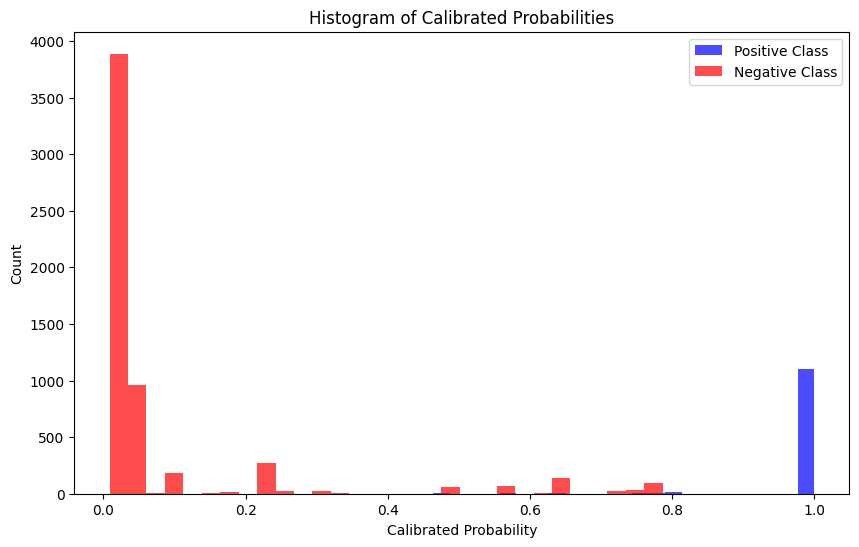

In [112]:
import matplotlib.pyplot as plt

# Get the calibrated probabilities
calibrated_probabilities = see['AdjustedBehaviourScore']

# Split the data into positive and negative classes based on the updated requirement
positive_class = calibrated_probabilities[see['Ever90'] == 1]
negative_class = calibrated_probabilities[see['Ever90'] == 0]

# Plot histograms of calibrated probabilities with actual counts instead of density
plt.figure(figsize=(10, 6))
plt.hist(positive_class, bins=30, color='blue', alpha=0.7, label='Positive Class')
plt.hist(negative_class, bins=30, color='red', alpha=0.7, label='Negative Class')
plt.xlabel('Calibrated Probability')
plt.ylabel('Count')
plt.title('Histogram of Calibrated Probabilities')
plt.legend()
plt.show()




/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_1372/1789985690.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd_grouped = tt.groupby('PDCategory')['CurrentAmount'].sum()


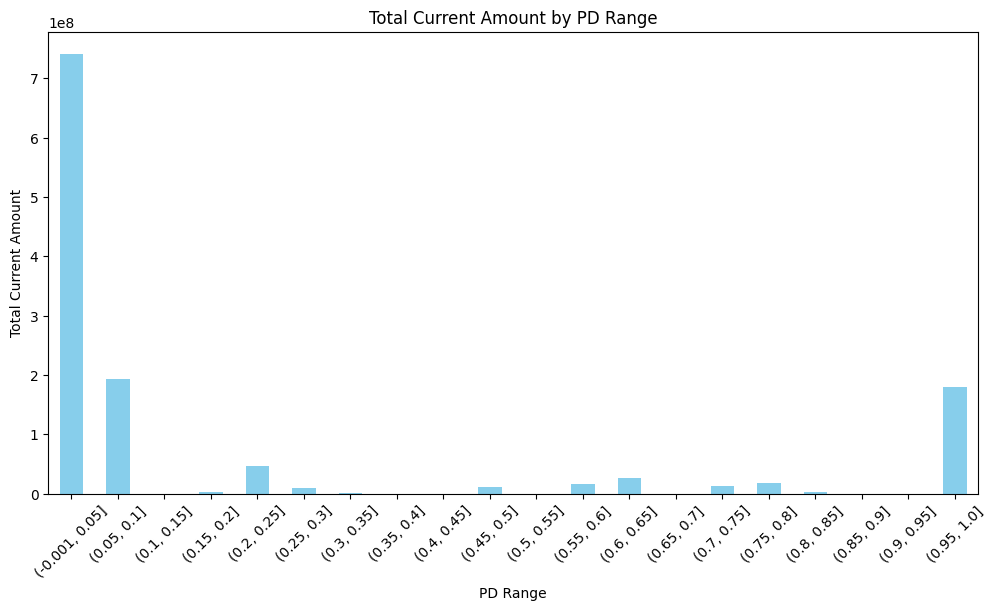

In [113]:

tt = see.copy()


# Define PD ranges (for example, 0-0.1, 0.1-0.2, ..., 0.9-1.0)
pd_bins = np.linspace(0, 1, 21)  # 10 equal intervals from 0 to 1
tt['PDCategory'] = pd.cut(tt['AdjustedBehaviourScore'], pd_bins, include_lowest=True, right=True)

# Group by PD category and sum 'CurrentAmount' within each category
pd_grouped = tt.groupby('PDCategory')['CurrentAmount'].sum()

# Plot
plt.figure(figsize=(12, 6))
pd_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('PD Range')
plt.ylabel('Total Current Amount')
plt.title('Total Current Amount by PD Range')
plt.xticks(rotation=45)
plt.show()

In [114]:
print(np.min(see['AdjustedBehaviourScore']))
print(np.max(see['AdjustedBehaviourScore']))
print(np.mean(see['AdjustedBehaviourScore']))

print(np.mean(see['Score']))

0.008710691203618422
1.0
0.23375334745939963
24.332615896410076


In [115]:
print(np.mean(see[see.Stageing == 'Stage1'].AdjustedBehaviourScore))

print(np.mean(see[see.Stageing == 'Stage2'].AdjustedBehaviourScore))

0.0399868371747329
0.6252754621933273


In [116]:
see[(see.Stage == 'Stage2')& (see.Stageing == 'Stage1')].tail(20)


,AccountNumber,AccountStatus,SnapshotDate,MOB,DisbursedDate,CurrentAmount,RemainingTenor,CoappFlag,Ever30In6Months,WorstDelinquency6M,CurrentDelinquencyStatus,WorstDelinquency12M,Ever30In12Months,Ever90In12Months,Score,RiskClass,P,BehaviourModel,Ever90,PDScoreNew,UCScore,age,Inquiries12M,PropertyVolume,AdmissionModel,ApplicationScore,Stage,AppliedApplicationScore,AdjustedBehaviourScore,PD_Delta,SICR,Stageing,AdjustedBehaviourScore_1m,SnapshotDate_1m,Stage_1m,Stageing_1m,CurrentAmount_1m
5318,7917743,OPEN,2023-12-31,7.0,2023-05-31,172979.72,137.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.045,50.0,4.0,0.0,0.034998,0.945136,Stage2,0.009451,0.216872,0.207421,0.0,Stage1,0.216872,2023-11-30,Stage2,Stage1,173507.91
5319,7745912,OPEN,2023-12-31,19.0,2022-05-09,158836.76,160.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.072,29.0,32.0,0.0,0.117987,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.057309,2023-11-30,Stage1,Stage1,158836.76
5320,7245574,OPEN,2023-12-31,32.0,2021-04-21,125026.22,40.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,39.215327,E5,0.741876,0.216872,0.0,NaN,0.085,29.0,10.0,0.0,0.063927,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.216872,2023-11-30,Stage2,Stage1,128112.23
5321,7757313,OPEN,2023-12-31,19.0,2022-05-31,95926.09,125.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.041,33.0,4.0,0.0,0.046276,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,95926.09
5322,7744204,OPEN,2023-12-31,20.0,2022-04-27,37087.33,40.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.027,38.0,5.0,0.0,0.042575,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,37087.33
5323,7719909,OPEN,2023-12-31,22.0,2022-02-11,92529.73,158.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.060,29.0,35.0,0.0,0.125330,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,92529.73
5324,7247489,OPEN,2023-12-31,32.0,2021-04-08,115369.08,87.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.044,41.0,4.0,0.0,0.040467,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.057309,2023-11-30,Stage1,Stage1,115369.08
5325,7227556,OPEN,2023-12-31,33.0,2021-03-01,178277.60,205.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.052,37.0,2.0,556560.0,0.037993,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.057309,2023-11-30,Stage1,Stage1,178277.60
5326,7176019,OPEN,2023-12-31,41.0,2020-07-01,33233.06,30.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.099,35.0,16.0,0.0,0.069850,0.837495,Stage2,0.008375,0.216872,0.208497,0.0,Stage1,0.057309,2023-11-30,Stage1,Stage1,33233.06
5327,7827751,OPEN,2023-12-31,14.0,2022-10-27,281751.94,166.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,27.662599,E5,0.741876,0.216872,0.0,NaN,0.092,43.0,10.0,518610.0,0.045510,0.669086,Stage2,0.006691,0.216872,0.210181,0.0,Stage1,0.025065,2023-11-30,Stage1,Stage1,281751.94


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

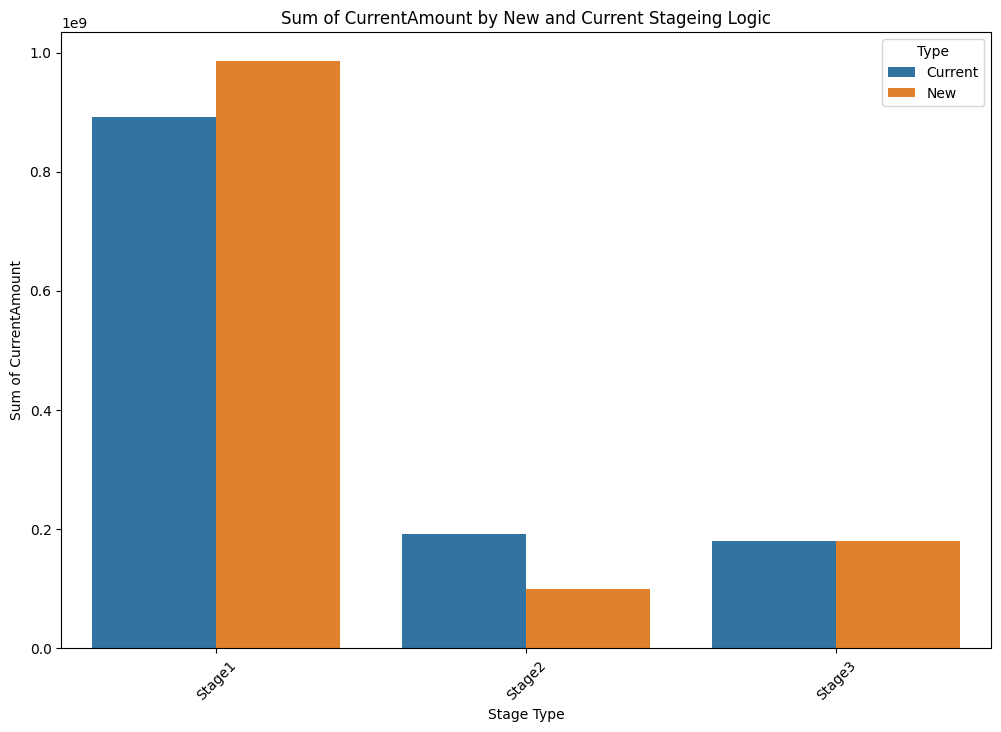

In [117]:

import seaborn as sns

see.groupby('Stage')['CurrentAmount'].sum()
see.groupby('Stageing')['CurrentAmount'].sum()

# Assuming 'see' is your DataFrame and it's already loaded

# Calculate the sum of 'CurrentAmount' for each 'Stage'
stage_sum = see.groupby('Stage')['CurrentAmount'].sum().reset_index()

# Calculate the sum of 'CurrentAmount' for each 'Stageing'
stageing_sum = see.groupby('Stageing')['CurrentAmount'].sum().reset_index()

# Rename the columns for concatenation
stage_sum.rename(columns={'Stage': 'StageType', 'CurrentAmount': 'SumAmount'}, inplace=True)
stageing_sum.rename(columns={'Stageing': 'StageType', 'CurrentAmount': 'SumAmount'}, inplace=True)

# Add a new column to each DataFrame to distinguish between 'Stage' and 'Stageing'
stage_sum['Type'] = 'Current'
stageing_sum['Type'] = 'New'

# Concatenate the two DataFrames
combined_sum = pd.concat([stage_sum, stageing_sum])

# Now, let's create the combined bar plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='StageType', y='SumAmount', hue='Type', data=combined_sum)
plt.title('Sum of CurrentAmount by New and Current Stageing Logic')
plt.ylabel('Sum of CurrentAmount')
plt.xlabel('Stage Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


## skillnade är att om de blir sen med en faktura vilket kan vara 6 dagar så kommer de hoppa i den tidigare, den nya säger att först från 2 fakturor sen så är det mer kritiskt


Också att om de har varit 30 + senaste 12 månaderna

/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

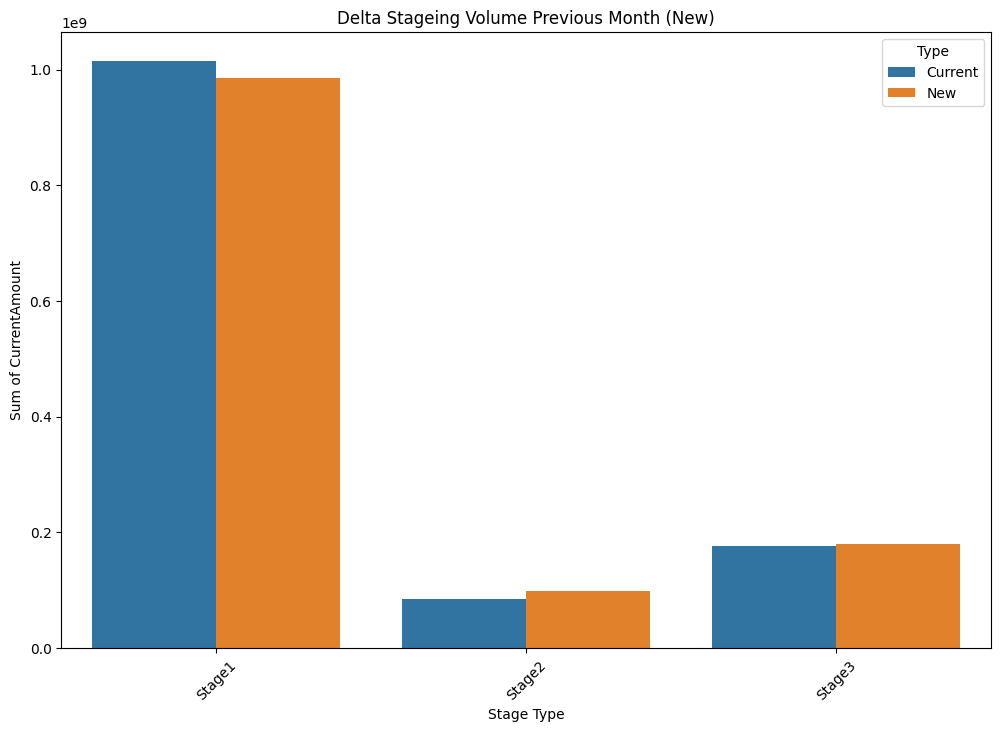

In [118]:

import seaborn as sns

# Assuming 'see' is your DataFrame and it's already loaded

# Calculate the sum of 'CurrentAmount' for each 'Stage'
stage_sum = see.groupby('Stageing_1m')['CurrentAmount_1m'].sum().reset_index()

# Calculate the sum of 'CurrentAmount' for each 'Stageing'
stageing_sum = see.groupby('Stageing')['CurrentAmount'].sum().reset_index()

# Rename the columns for concatenation
stage_sum.rename(columns={'Stageing_1m': 'StageType', 'CurrentAmount_1m': 'SumAmount'}, inplace=True)
stageing_sum.rename(columns={'Stageing': 'StageType', 'CurrentAmount': 'SumAmount'}, inplace=True)

# Add a new column to each DataFrame to distinguish between 'Stage' and 'Stageing'
stage_sum['Type'] = 'Current'
stageing_sum['Type'] = 'New'

# Concatenate the two DataFrames
combined_sum = pd.concat([stage_sum, stageing_sum])

# Now, let's create the combined bar plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='StageType', y='SumAmount', hue='Type', data=combined_sum)
plt.title('Delta Stageing Volume Previous Month (New)')
plt.ylabel('Sum of CurrentAmount')
plt.xlabel('Stage Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreasnilsson/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

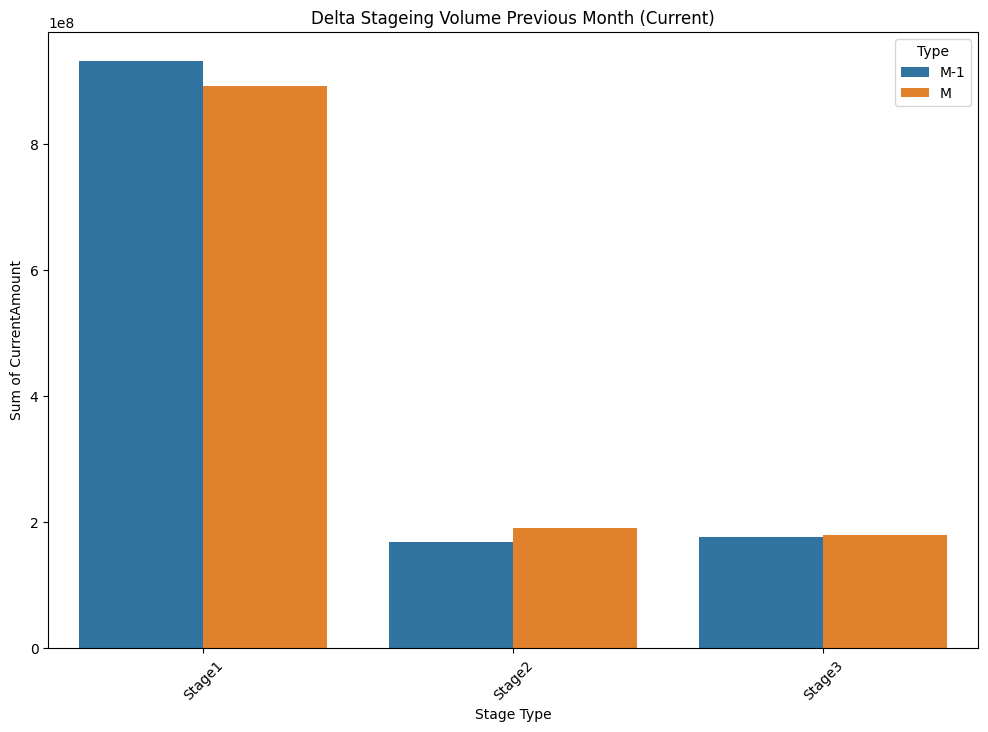

In [119]:

import seaborn as sns

# Assuming 'see' is your DataFrame and it's already loaded

# Calculate the sum of 'CurrentAmount' for each 'Stage'
stage_sum = see.groupby('Stage_1m')['CurrentAmount_1m'].sum().reset_index()

# Calculate the sum of 'CurrentAmount' for each 'Stageing'
stageing_sum = see.groupby('Stage')['CurrentAmount'].sum().reset_index()

# Rename the columns for concatenation
stage_sum.rename(columns={'Stage_1m': 'StageType', 'CurrentAmount_1m': 'SumAmount'}, inplace=True)
stageing_sum.rename(columns={'Stage': 'StageType', 'CurrentAmount': 'SumAmount'}, inplace=True)

# Add a new column to each DataFrame to distinguish between 'Stage' and 'Stageing'
stage_sum['Type'] = 'M-1'
stageing_sum['Type'] = 'M'

# Concatenate the two DataFrames
combined_sum = pd.concat([stage_sum, stageing_sum])

# Now, let's create the combined bar plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='StageType', y='SumAmount', hue='Type', data=combined_sum)
plt.title('Delta Stageing Volume Previous Month (Current)')
plt.ylabel('Sum of CurrentAmount')
plt.xlabel('Stage Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


In [120]:
combined_sum

,StageType,SumAmount,Type
0,Stage1,9.317552e+08,M-1
1,Stage2,1.677097e+08,M-1
2,Stage3,1.759726e+08,M-1
0,Stage1,8.923883e+08,M
1,Stage2,1.914005e+08,M
2,Stage3,1.803811e+08,M


In [121]:
reporting = see[['AccountNumber','SnapshotDate','MOB','DisbursedDate','CurrentAmount','CurrentAmount_1m','AppliedScore','AppliedScore_1m','Stageing','Stageing_1m','PD_Delta','SICR']]
reporting

KeyError: "['AppliedScore', 'AppliedScore_1m'] not in index"